# Implementation of Binary Logistic Regression using Tensorflow core

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-07-19 20:38:15.734261: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 20:38:15.937648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-19 20:38:15.938848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 20:38:17.080039: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
SEED = 58
tf.random.set_seed(SEED)

In [3]:
tf.random.normal((1,2))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.5668071, 1.1792463]], dtype=float32)>

# Load the Data

In [64]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [65]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [66]:
NUM_CLASSES = len(np.unique(y_train))
print(f"There are {NUM_CLASSES} unique classes in this dataset")

There are 10 unique classes in this dataset


In [67]:
class_label1 = 0  # digit seven
class_label2 = 1  # digit one

x_train_binary = x_train[(y_train == class_label1) | (y_train == class_label2)]
y_train_binary = y_train[(y_train == class_label1) | (y_train == class_label2)]

In [68]:
print("x_train shape: ",x_train_binary.shape)
print("y_train shape: ", y_train_binary.shape)

x_train shape:  (12665, 28, 28)
y_train shape:  (12665,)


In [69]:
CLASSES = np.unique(y_train_binary)
NUM_CLASSES = len(CLASSES)
print(f"There are {NUM_CLASSES} unique classes in this dataset and they are {CLASSES}")

There are 2 unique classes in this dataset and they are [0 1]


In [70]:
def show_data(index, x, y):
    plt.figure(figsize=(20,4))
    for i in range(index, index+5):
        img = x[i]
        label = y[i]
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title('Training: %i\n' % label, fontsize = 15);

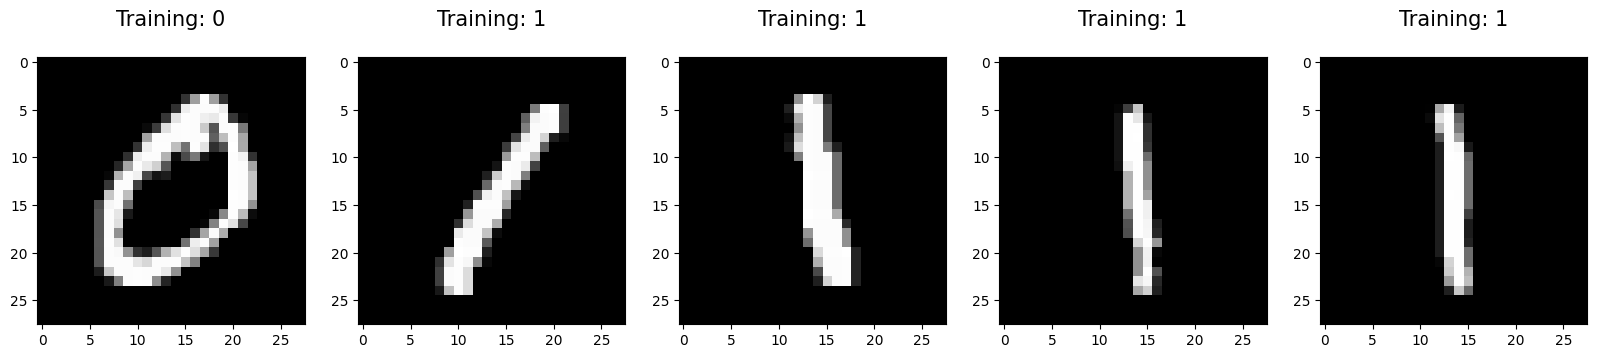

In [71]:
show_data(0, x_train_binary, y_train_binary)

In [72]:
x_train = x_train_binary
y_train = y_train_binary

# Preprocess the data

In [73]:
x_train = tf.reshape(x_train, shape=(x_train.shape[0], -1))
x_test = tf.reshape(x_test, shape=(x_test.shape[0], -1))

In [74]:
x_train.shape, x_test.shape

(TensorShape([12665, 784]), TensorShape([10000, 784]))

In [75]:
x_train = tf.cast(tf.transpose(x_train), "float32")
y_train = tf.constant(y_train)
print("New x_train shape: ", x_train.shape)

New x_train shape:  (784, 12665)


In [76]:
# Normalization 
class Normalize(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
    def norm(self, x):
        # normalize the input image
        return x / 255.
    def denorm(self, x):
        return x*255.

In [77]:
norm_x = Normalize()

In [78]:
x_train = norm_x.norm(x_train)

In [79]:
tf.reduce_min(x_train).numpy(), tf.reduce_max(x_train).numpy()

(0.0, 1.0)

# Sigmoid Activation function

In [102]:
def sigmoid(z):
    exp_z = tf.math.exp(-z)
    return 1 / (1 + exp_z)

# Binary Cross Entropy

In [96]:
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [97]:
y_true = [0, 1, 0, 0]
y_pred = [0.6, 0.3, 0.2, 0.8] 
binary_cross_entropy(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.988211>

# Model Building

In [167]:
tf.random.normal([1, 10], )

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.0415059 ,  0.7293062 , -1.0670805 , -0.14575548,  0.92748135,
        -1.3405008 ,  0.6356525 ,  0.81411606,  0.22635087, -0.99689746]],
      dtype=float32)>

In [171]:
tf.random.uniform([1, 10])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.90832615, 0.5792527 , 0.8658742 , 0.966949  , 0.3265425 ,
        0.82195234, 0.76675725, 0.23753548, 0.6970676 , 0.3080865 ]],
      dtype=float32)>

In [184]:
class BinaryLogisticRegression(tf.Module):
    def __init__(self, name=None, **kwargs):
        super().__init__(name=name, **kwargs)
        self.is_built = False
    
    def build(self, num_features):
        # randomly generate bias and weights
        self.weights = tf.Variable(tf.random.normal([1, num_features]), name="weights")
        self.bias = tf.Variable(tf.zeros([1]), name="bias")
        print("build successfully")
        
    def predict(self, x):
        #compute model output
        # compute logits
        logits = self.weights @ x + self.bias
        z = sigmoid(logits)
#         z = tf.keras.activations.sigmoid(logits)
        return z
    
    def __call__(self, x):
        if not self.is_built:
            self.build(x.shape[0])
            self.is_built = True
        return self.predict(x)

In [185]:
x_train_sample = x_train[:, 100:120]
y_train_sample = y_train[100:120]
x_train_sample.shape, y_train_sample.shape

(TensorShape([784, 20]), TensorShape([20]))

In [186]:
model = BinaryLogisticRegression()

In [187]:
model(x_train_sample)

build successfully


<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0.9786402 , 0.8994124 , 0.9997044 , 0.44678774, 0.9989172 ,
        0.9999995 , 1.        , 1.        , 0.99423945, 0.04136357,
        0.00241864, 0.99944824, 0.2995294 , 0.6271704 , 0.99999905,
        0.9984855 , 0.9993119 , 0.99999046, 0.9997744 , 0.92045987]],
      dtype=float32)>

# Accuracy Metrics

In [188]:
def calculate_accuracy(y_true, y_pred, threshold=0.5):
    y_pred = tf.cast(y_pred >= 0.5, "int16")
    y_true = tf.cast(y_true, "int16")
    match = tf.cast(tf.equal(y_true, y_pred), "float32")
    return tf.reduce_mean(match)

In [189]:
y_true = tf.constant([0, 1, 0, 0])
y_pred = tf.constant([0.6, 0.3, 0.2, 0.8])

calculate_accuracy(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

# Train Function

In [190]:
# defining training function
def train(model, x_train, y_train, learning_rate=0.01):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        acc = calculate_accuracy(y_train, y_pred)
        loss = binary_cross_entropy(y_train, y_pred)

    dw, db = tape.gradient(loss, [model.weights, model.bias])
    print(tf.reduce_min(dw).numpy(), tf.reduce_max(dw).numpy())
    model.weights.assign_sub(learning_rate * dw)
    model.bias.assign_sub(learning_rate * db)
    return loss, acc

In [191]:
train(model, x_train_sample, y_train_sample, learning_rate=0.01)

-0.0868551 0.20470445


(<tf.Tensor: shape=(), dtype=float32, numpy=3.2101848>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5>)

# Training Loop

In [192]:
def display_training_summary(loss, accuracy, epoch):
    print(f"EPOCH: {epoch} --- loss: {loss}---accuracy: {accuracy}")

In [193]:
# sample train data
x_train_sample = x_train[:, :10_000]
y_train_sample = y_train[:10_000]

x_train_sample.shape, y_train_sample.shape

(TensorShape([784, 10000]), TensorShape([10000]))

In [194]:
#model initiate
model = BinaryLogisticRegression()
LOSS_HISTORY = []
ACC_HISTORY = []

In [195]:
NUM_EPOCHS = 50
LEARNING_RATE = 0.1

#  Training Loop
for epoch in range(NUM_EPOCHS):
    loss, acc = train(model, x_train_sample, y_train_sample, LEARNING_RATE)
    LOSS_HISTORY.append(loss)
    ACC_HISTORY.append(acc)
    display_training_summary(loss, acc, epoch+1)

build successfully
-0.013034324 0.24176362
EPOCH: 1 --- loss: 1.7212613821029663---accuracy: 0.675000011920929
-0.017493147 0.18818471
EPOCH: 2 --- loss: 1.1721497774124146---accuracy: 0.7430999875068665
-0.021327041 0.14534897
EPOCH: 3 --- loss: 0.8541484475135803---accuracy: 0.7979999780654907
-0.024337493 0.11589146
EPOCH: 4 --- loss: 0.6700607538223267---accuracy: 0.8324000239372253
-0.026643552 0.09559204
EPOCH: 5 --- loss: 0.555742084980011---accuracy: 0.8532000184059143
-0.028375065 0.08130844
EPOCH: 6 --- loss: 0.47963857650756836---accuracy: 0.8708999752998352
-0.029650008 0.07057373
EPOCH: 7 --- loss: 0.4258582592010498---accuracy: 0.8841000199317932
-0.030560618 0.06243335
EPOCH: 8 --- loss: 0.3861510157585144---accuracy: 0.8928999900817871
-0.031187655 0.056079596
EPOCH: 9 --- loss: 0.355548620223999---accuracy: 0.9007999897003174
-0.03159147 0.050957948
EPOCH: 10 --- loss: 0.3310440480709076---accuracy: 0.9077000021934509
-0.03181702 0.04679081
EPOCH: 11 --- loss: 0.310966

# Testing

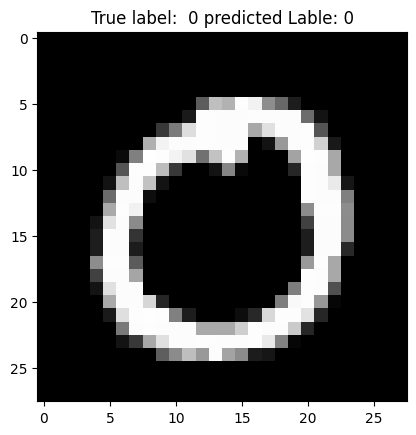

In [200]:
index = 50
test_image = x_train[:, index]
test_image = tf.reshape(test_image, shape=(-1, 1))
test_label = y_train[index]
y_pred = model(test_image)
predicted_label = tf.cast(y_pred >= 0.5, "int16")[0][0]

plt.title(f"True label:  {test_label} predicted Lable: {predicted_label}")
img = tf.reshape(test_image, shape=(28, 28)).numpy()
plt.imshow(img, cmap="gray")